# Week 1 Lab – Regression and cloud ready AI infrastructure Part N°2
## David Santiago Castro Sierra

In this second part of the lab we will extend linear regression from **one feature** to **multiple features**, and then to **polynomial regression**, using **Stellar luminosity** 

We keep the same notation as in class:

- The $i$-th training example is $(x^{(i)}, y^{(i)})$.
- Each input $x^{(i)}$ has $n$ features: 
  $$
  x^{(i)} = \big[x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)}\big].
  $$
- The model (hypothesis) is a function $f_{w,b}(x)$ that depends on parameters $w$ and $b$:
  $$
  f_{w,b}(x) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b.
  $$


## 0.1 Linear Regression with Multiple Features

For one feature we had
$$
f_{w,b}(x) = wx + b.
$$

For **multiple features**, with $\vec{x} \in \mathbb{R}^n$ and $\vec{w} \in \mathbb{R}^n$, we write
$$
f_{\vec{w}, b}(\vec{x}) = \sum_{j=1}^{n} w_j x_j + b.
$$

In **vector notation** this becomes
$$
f_{\vec{w}, b}(\vec{x}) = \vec{w}^T \vec{x} + b.
$$

For a whole dataset with $m$ examples, we collect the inputs into a **design matrix** $\mathbf{X} \in \mathbb{R}^{m \times n}$:
- Row $i$ of $\mathbf{X}$ is $(x_1^{(i)}, \dots, x_n^{(i)})$.
- The target vector is $\vec{y} \in \mathbb{R}^m$, with entries $y^{(i)}$.

Then the predictions for all examples at once are
$$
\hat{\vec{y}} = \mathbf{X} \vec{w} + b \,\vec{1},
$$
where $\vec{1}$ is the vector of all ones (size $m$).


## 0.2 Cost Function for Multiple Features

The cost function is the same **mean squared error** we used before, now written for the multivariate case:

$$
J(\vec{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right)^2.
$$


## 0.3 Gradient Descent for Multiple Features

The partial derivatives of $J(\vec{w}, b)$ are:

- For each $w_j$:
  $$
  \frac{\partial J(\vec{w}, b)}{\partial w_j} 
  = \frac{1}{m} \sum_{i=1}^{m} \big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big)\, x_j^{(i)}.
  $$

- For the bias term $b$:
  $$
  \frac{\partial J(\vec{w}, b)}{\partial b} 
  = \frac{1}{m} \sum_{i=1}^{m} \big( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \big).
  $$

In **vector/matrix form**, let
- $\hat{\vec{y}} = f_{\vec{w}, b}(\mathbf{X})$ (the vector of predictions),
- $\vec{e} = \hat{\vec{y}} - \vec{y}$ (the error vector).

Then:
$$
\nabla_{\vec{w}} J(\vec{w}, b) 
= \frac{1}{m} \,\mathbf{X}^T \vec{e},
\qquad
\frac{\partial J(\vec{w}, b)}{\partial b}
= \frac{1}{m} \sum_{i=1}^{m} e^{(i)}.
$$

The gradient descent updates are:
$$
\vec{w} := \vec{w} - \alpha \, \nabla_{\vec{w}} J(\vec{w}, b),
\qquad
b := b - \alpha \, \frac{\partial J(\vec{w}, b)}{\partial b},
$$
where $\alpha$ is the learning rate.


## Setup

In [1]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=4, suppress=True)



## 2. A Stellar luminosity Prices Dataset

We will simulate a small stellar luminosity dataset with the following features:

- $x_1$ = `stellar_mass` (mass of the star in units of solar mass),
- $x_2$ = `stellar_temperature` (effective stellar temperature in degrees Kelvin),
- $x_3$ = `stellar_mass_square` (the square of the star's mass; the luminosity of stars grows much faster than mass; if mass doubles, luminosity not only doubles, but quadruples),
- $x_4$ = `stellar_mass_temperature` (the mass of the star by temperature, mass, and temperature do not work in isolation. A very massive but cold star shines differently than a massive and hot one).

The target $y$ is the stellar luminosity (in units of solar luminosity).


where: dataset 
- M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
- T = [3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200]
- L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]



## Load a Simple Dataset

We will load a synthetic dataset that roughly follows a polynomial relationship:

$$
\hat{\vec{y}} = \mathbf{X} \vec{w} + b \,\vec{1},
$$
where $\vec{1}$ is the vector of all ones (size $m$).


Each input $x^{(i)}$ has $n$ features: 
  $$
  x^{(i)} = \big[x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)}\big].
  $$

In [22]:
stellar_mass = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
stellar_temperature = [3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200]
stellar_mass_square = [m**2 for m in stellar_mass]
stellar_mass_temperature = [m * t for m, t in zip(stellar_mass, stellar_temperature)]
L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

# Number of examples
m= len(stellar_mass)


# Build design matrix X and target y
X = np.column_stack([stellar_mass, stellar_mass_square, stellar_mass_temperature])
y = L

# Put into a DataFrame just to inspect
data = pd.DataFrame({
    "stellar_mass": stellar_mass,
    "stellar_mass_square": stellar_mass_square,
    "stellar_mass_temperature": stellar_mass_temperature,
    "luminosity": y,
})

data.head()


,stellar_mass,stellar_mass_square,stellar_mass_temperature,luminosity
0,0.6,0.36,2280.0,0.15
1,0.8,0.64,3520.0,0.35
2,1.0,1.00,5800.0,1.00
3,1.2,1.44,7680.0,2.30
4,1.4,1.96,9660.0,4.10


### 1. Dataset visualization

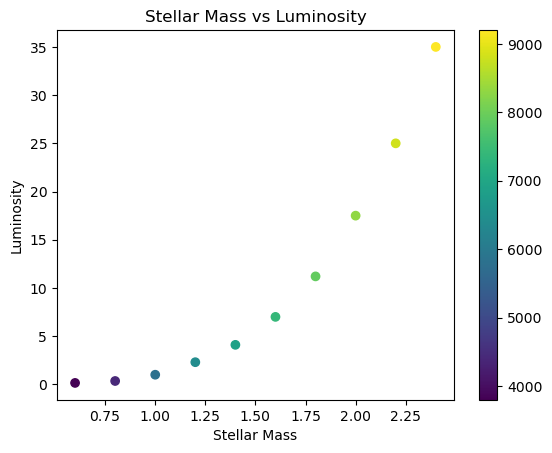

In [23]:

plt.figure()
plt.scatter(data["stellar_mass"], data["luminosity"], c=stellar_temperature, cmap='viridis')
plt.xlabel("Stellar Mass")
plt.ylabel("Luminosity")
plt.title("Stellar Mass vs Luminosity")
cbar = plt.colorbar()
plt.show()



## 2. Feature engineering

We now implement the model and cost function using **NumPy arrays** and **vectorized operations**.

### 2.1 Hypothesis $f_{w,b}(x)$

For a dataset with matrix $X$ and parameters $w$ and $b$, the vector of predictions is:
$$
\hat{y} = X w + b.
$$


In [24]:

def predict(X, w, b):
    """Compute predictions f_{w,b}(x) for all examples.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
        Design matrix: each row is x^(i).
    w : np.ndarray, shape (n,)
        Parameter vector.
    b : float
        Bias term.

    Returns
    -------
    y_hat : np.ndarray, shape (m,)
        Vector of predictions for each example.
    """
    return X @ w + b  # vectorized: matrix-vector product + scalar



### 3. Loss and gradients (vectorized)

We recall
$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)^2.
$$

In vector form, if we define the error vector $e = \hat{y} - y$, then
$$
J(w,b) = \frac{1}{2m} e^T e.
$$


In [27]:

def compute_cost(X, y, w, b):
    """Compute the cost J(w,b) for linear regression with multiple features.

    Uses the vectorized formula:
        J = (1 / (2m)) * (y_hat - y)^T (y_hat - y)

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w : np.ndarray, shape (n,)
    b : float

    Returns
    -------
    cost : float
    """
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y
    cost = (error @ error) / (2 * m)
    return cost

# Test with w = 0, b = 0
n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0
print("Cost with w=0, b=0:", compute_cost(X, y, w_test, b_test))


Cost with w=0, b=0: 117.69675



## 3.1 Gradient of the Cost Function (Vectorized)

We derived:
$$
\nabla_w J(w,b) = \frac{1}{m} X^T (\hat{y} - y), \qquad
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}).
$$

We now implement this directly in NumPy.


In [28]:

def compute_gradient(X, y, w, b):
    """Compute the gradients of J with respect to w and b.

    Vectorized formulas:
        dj_dw = (1/m) * X^T (y_hat - y)
        dj_db = (1/m) * sum(y_hat - y)
    """
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient(X, y, w_test, b_test)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)


Gradient at w=0, b=0:
dj_dw: [    -21.523      -45.9434 -185408.8   ]
dj_db: -10.36



## 4. Gradient descent + convergence

We now put everything together into a gradient descent loop.

At each iteration:
1. Compute $\hat{y} = f_{w,b}(X)$.
2. Compute the gradients $\nabla_w J$ and $\partial J / \partial b$.
3. Update
   $$
   w := w - \alpha \nabla_w J, \qquad
   b := b - \alpha \frac{\partial J}{\partial b}.
   $$


In [74]:

def gradient_descent(X, y, w_init, b_init, alpha, num_iterations):
    """Run gradient descent to learn w and b.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w_init : np.ndarray, shape (n,)
    b_init : float
    alpha : float
        Learning rate.
    num_iterations : int

    Returns
    -------
    w : np.ndarray, shape (n,)
    b : float
    history_it : list of int
    history_cost : list of float
    """
    w = w_init.copy()
    b = b_init
    history_it = []
    history_cost = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 10 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, y, w, b)
            history_it.append(i)
            history_cost.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w, b, history_it, history_cost

alpha = 5e-9 
num_iterations = 1000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: cost =  20.4772
Iteration   10: cost =  15.6356
Iteration   20: cost =  12.5207
Iteration   30: cost =  10.2318
Iteration   40: cost =   8.5498
Iteration   50: cost =   7.3138
Iteration   60: cost =   6.4056
Iteration   70: cost =   5.7382
Iteration   80: cost =   5.2477
Iteration   90: cost =   4.8873
Iteration  100: cost =   4.6225
Iteration  110: cost =   4.4279
Iteration  120: cost =   4.2849
Iteration  130: cost =   4.1798
Iteration  140: cost =   4.1026
Iteration  150: cost =   4.0458
Iteration  160: cost =   4.0041
Iteration  170: cost =   3.9735
Iteration  180: cost =   3.9510
Iteration  190: cost =   3.9344
Iteration  200: cost =   3.9223
Iteration  210: cost =   3.9133
Iteration  220: cost =   3.9068
Iteration  230: cost =   3.9019
Iteration  240: cost =   3.8984
Iteration  250: cost =   3.8958
Iteration  260: cost =   3.8939
Iteration  270: cost =   3.8925
Iteration  280: cost =   3.8914
Iteration  290: cost =   3.8907
Iteration  300: cost =   3.8901
Iteratio

### 4.1 Plot the loss over Iterations

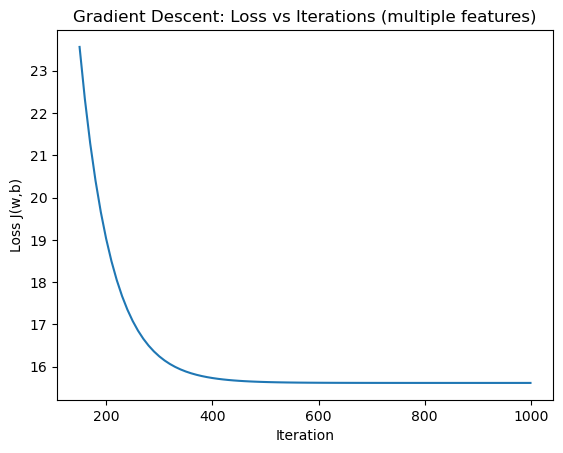

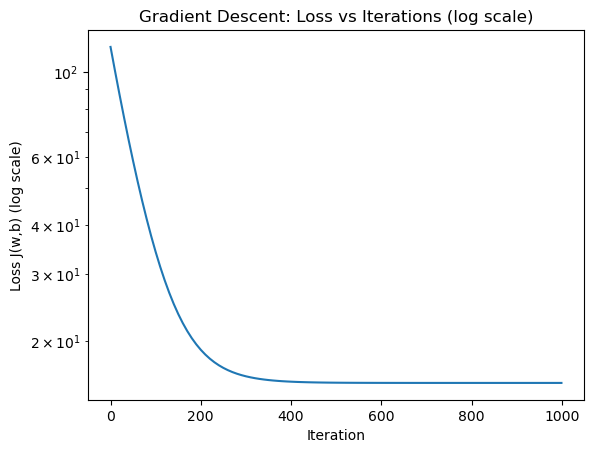

In [62]:

plt.figure()
plt.plot(it_hist[15:], cost_hist[15:])
plt.xlabel("Iteration")
plt.ylabel("Loss J(w,b)")
plt.title("Gradient Descent: Loss vs Iterations (multiple features)")
plt.show()

plt.figure()
plt.semilogy(it_hist, cost_hist)
plt.xlabel("Iteration")
plt.ylabel("Loss J(w,b) (log scale)")
plt.title("Gradient Descent: Loss vs Iterations (log scale)")
plt.show()


### 5. Feature selection experiment 

Iteration    0: cost =  83.9760
Iteration   10: cost =  41.2930
Iteration   20: cost =  41.1649
Iteration   30: cost =  41.1645
Iteration   40: cost =  41.1645
Iteration   50: cost =  41.1645
Iteration   60: cost =  41.1645
Iteration   70: cost =  41.1645
Iteration   80: cost =  41.1645
Iteration   90: cost =  41.1645
Iteration  100: cost =  41.1645
Iteration  110: cost =  41.1645
Iteration  120: cost =  41.1645
Iteration  130: cost =  41.1645
Iteration  140: cost =  41.1645
Iteration  150: cost =  41.1645
Iteration  160: cost =  41.1645
Iteration  170: cost =  41.1645
Iteration  180: cost =  41.1645
Iteration  190: cost =  41.1645
Iteration  200: cost =  41.1645
Iteration  210: cost =  41.1645
Iteration  220: cost =  41.1645
Iteration  230: cost =  41.1645
Iteration  240: cost =  41.1645
Iteration  250: cost =  41.1645
Iteration  260: cost =  41.1645
Iteration  270: cost =  41.1645
Iteration  280: cost =  41.1645
Iteration  290: cost =  41.1645
Iteration  300: cost =  41.1645
Iteratio

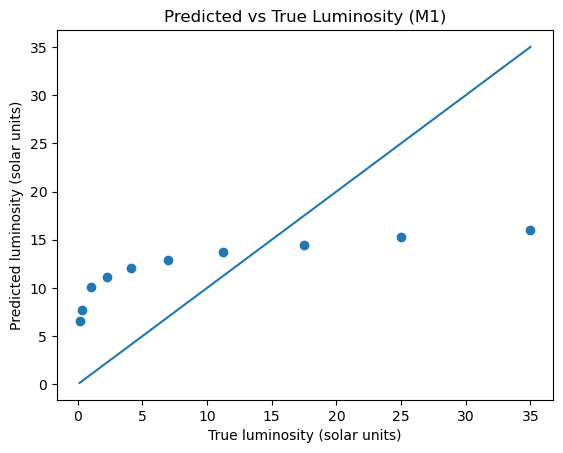

Iteration    0: cost =  83.9760
Iteration   10: cost =  41.2930
Iteration   20: cost =  41.1649
Iteration   30: cost =  41.1645
Iteration   40: cost =  41.1645
Iteration   50: cost =  41.1645
Iteration   60: cost =  41.1645
Iteration   70: cost =  41.1645
Iteration   80: cost =  41.1645
Iteration   90: cost =  41.1645
Iteration  100: cost =  41.1645
Iteration  110: cost =  41.1645
Iteration  120: cost =  41.1645
Iteration  130: cost =  41.1644
Iteration  140: cost =  41.1644
Iteration  150: cost =  41.1644
Iteration  160: cost =  41.1644
Iteration  170: cost =  41.1644
Iteration  180: cost =  41.1644
Iteration  190: cost =  41.1644
Iteration  200: cost =  41.1644
Iteration  210: cost =  41.1644
Iteration  220: cost =  41.1644
Iteration  230: cost =  41.1644
Iteration  240: cost =  41.1644
Iteration  250: cost =  41.1644
Iteration  260: cost =  41.1644
Iteration  270: cost =  41.1644
Iteration  280: cost =  41.1644
Iteration  290: cost =  41.1644
Iteration  300: cost =  41.1644
Iteratio

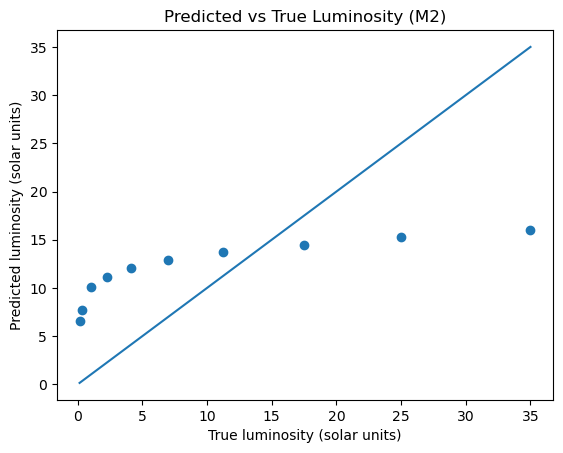

Iteration    0: cost =  20.4772
Iteration   10: cost =  15.6356
Iteration   20: cost =  12.5207
Iteration   30: cost =  10.2318
Iteration   40: cost =   8.5498
Iteration   50: cost =   7.3138
Iteration   60: cost =   6.4056
Iteration   70: cost =   5.7382
Iteration   80: cost =   5.2477
Iteration   90: cost =   4.8873
Iteration  100: cost =   4.6225
Iteration  110: cost =   4.4279
Iteration  120: cost =   4.2849
Iteration  130: cost =   4.1798
Iteration  140: cost =   4.1026
Iteration  150: cost =   4.0458
Iteration  160: cost =   4.0041
Iteration  170: cost =   3.9735
Iteration  180: cost =   3.9510
Iteration  190: cost =   3.9344
Iteration  200: cost =   3.9223
Iteration  210: cost =   3.9133
Iteration  220: cost =   3.9068
Iteration  230: cost =   3.9019
Iteration  240: cost =   3.8984
Iteration  250: cost =   3.8958
Iteration  260: cost =   3.8939
Iteration  270: cost =   3.8925
Iteration  280: cost =   3.8914
Iteration  290: cost =   3.8907
Iteration  300: cost =   3.8901
Iteratio

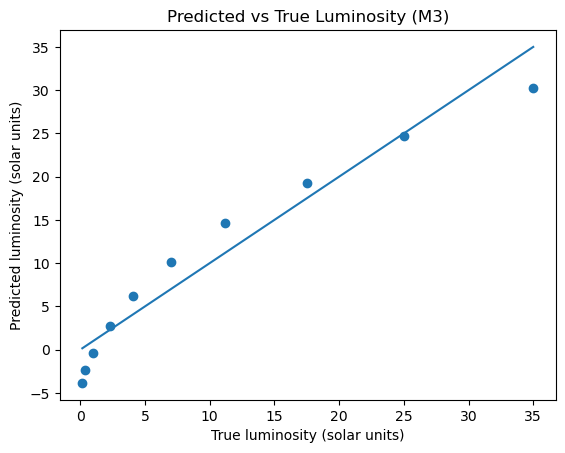

In [86]:

M = np.array(stellar_mass, dtype=float)
T = np.array(stellar_temperature, dtype=float)
y = np.array(L, dtype=float)

def build_X(model_name: str) -> np.ndarray:
    if model_name == "M1":      # [M, T]
        return np.column_stack((M, T))
    if model_name == "M2":      # [M, T, M^2]
        return np.column_stack((M, T, M**2))
    if model_name == "M3":      # [M, T, M^2, M*T]
        return np.column_stack((M, T, M**2, M*T))
    raise ValueError("model_name must be one of: 'M1', 'M2', 'M3'")

feature_names = {
    "M1": ["M", "T"],
    "M2": ["M", "T", "M^2"],
    "M3": ["M", "T", "M^2", "M*T"],
}

alpha = 5e-9       
num_iterations = 1000

results = {}
for model in ["M1", "M2", "M3"]:
    X = build_X(model)
    n = X.shape[1]
    w0 = np.zeros(n)
    b0 = 0.0

    w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, y, w0, b0, alpha, num_iterations)
    final_loss = compute_cost(X, y, w_learned, b_learned)
    y_pred = predict(X, w_learned, b_learned)

    results[model] = (w_learned, b_learned, final_loss)

    print(f"\n===== {model} =====")
    print("Features:", feature_names[model])
    print("Final loss:", final_loss)
    print("w:", w_learned)
    print("b:", b_learned)

    plt.figure()
    plt.scatter(y, y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()])
    plt.xlabel("True luminosity (solar units)")
    plt.ylabel("Predicted luminosity (solar units)")
    plt.title(f"Predicted vs True Luminosity ({model})")
    plt.show()


## 6. Cost vs interaction

Iteration    0: cost =  20.4772
Iteration   10: cost =  15.6356
Iteration   20: cost =  12.5207
Iteration   30: cost =  10.2318
Iteration   40: cost =   8.5498
Iteration   50: cost =   7.3138
Iteration   60: cost =   6.4056
Iteration   70: cost =   5.7382
Iteration   80: cost =   5.2477
Iteration   90: cost =   4.8873
Iteration  100: cost =   4.6225
Iteration  110: cost =   4.4279
Iteration  120: cost =   4.2849
Iteration  130: cost =   4.1798
Iteration  140: cost =   4.1026
Iteration  150: cost =   4.0458
Iteration  160: cost =   4.0041
Iteration  170: cost =   3.9735
Iteration  180: cost =   3.9510
Iteration  190: cost =   3.9344
Iteration  200: cost =   3.9223
Iteration  210: cost =   3.9133
Iteration  220: cost =   3.9068
Iteration  230: cost =   3.9019
Iteration  240: cost =   3.8984
Iteration  250: cost =   3.8958
Iteration  260: cost =   3.8939
Iteration  270: cost =   3.8925
Iteration  280: cost =   3.8914
Iteration  290: cost =   3.8907
Iteration  300: cost =   3.8901
Iteratio

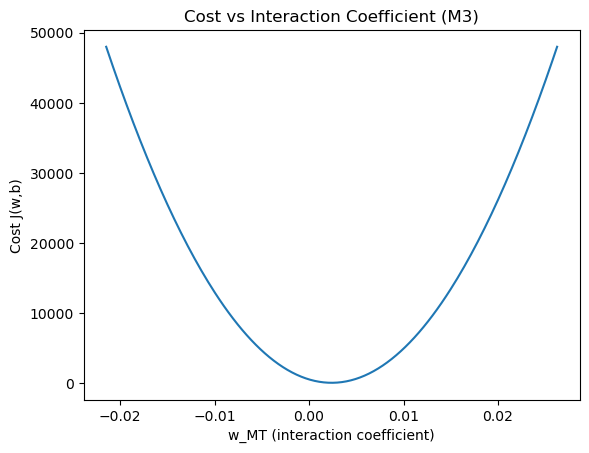

w_MT* (trained) = 0.0023870625854123884   min cost = 5.099974256040029


In [88]:

X_M3 = build_X("M3")        
y_np = np.array(L, dtype=float)

# Entrena M3 
w0 = np.zeros(X_M3.shape[1])
b0 = 0.0
w_tr, b_tr, _, _ = gradient_descent(X_M3, y_np, w0, b0, alpha=5e-9, num_iterations=1000)

# Barrer w_MT,  último coeficiente en M3
w_fixed = w_tr.copy()
wmt_star = w_fixed[-1]  # w_MT entrenado

# Rango razonable alrededor del valor entrenado 
span = 10 * (abs(wmt_star) + 1e-12)
wmt_values = np.linspace(wmt_star - span, wmt_star + span, 200)

costs = []
for v in wmt_values:
    w_try = w_fixed.copy()
    w_try[-1] = v
    costs.append(compute_cost(X_M3, y_np, w_try, b_tr))

plt.figure()
plt.plot(wmt_values, costs)
plt.xlabel("w_MT (interaction coefficient)")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs Interaction Coefficient (M3)")
plt.show()

print("w_MT* (trained) =", wmt_star, "  min cost =", np.min(costs))


We see that the model is sensitive to the interaction coefficient; if we move it, the error grows rapidly. This suggests that the term 𝑀*T provides us with useful information, and that the best value for the coefficient is close to the one learned through training

## 7. Inference demo

In [89]:
M_new = 1.3
T_new = 6600.0

# Vector de features para M3: [M, T, M^2, M*T]
x_new = np.array([M_new, T_new, M_new**2, M_new*T_new], dtype=float)

L_hat_new = x_new @ w_tr + b_tr
print("Predicted luminosity for (M=1.3, T=6600):", L_hat_new)


Predicted luminosity for (M=1.3, T=6600): 4.330089697295169


The prediction of 4.33 for a star with 𝑀=1.3 and 𝑇 = 6600 may be reasonable because those values fall within the points of the given dataset: M=1.2–1.4 and T=6400–6900 where the actual luminosities range from  L=2. 3 to  𝐿=4.1, suggesting a luminosity slightly above that of 𝑀=1.4, which can be explained by the combined effect of the quadratic term M^2 and the interaction term 𝑀*T, which increases when mass and temperature rise simultaneously; in any case, the value is of the same order of magnitude and close to the expected range, so it seems consistent to me given the data


## 8. Feature Scaling

Gradient descent can be **slow** if the features have very different scales.


A common solution is to **scale** each feature, for example using **standardization**:
$$
x_j^{(i)} \leftarrow \frac{x_j^{(i)} - \mu_j}{\sigma_j},
$$
where $\mu_j$ is the mean of feature $j$, and $\sigma_j$ its standard deviation.

We will implement a simple feature scaling function and compare convergence **with** and **without** scaling.


In [77]:

def feature_scale(X):
    """Standardize each feature to have mean 0 and standard deviation 1.

    Returns
    -------
    X_scaled : np.ndarray, shape (m, n)
    means : np.ndarray, shape (n,)
    stds : np.ndarray, shape (n,)
    """
    means = X.mean(axis=0)
    stds = X.std(axis=0, ddof=0)
    X_scaled = (X - means) / stds
    return X_scaled, means, stds

X_scaled, X_means, X_stds = feature_scale(X)
print("Feature means:", X_means)
print("Feature stds:", X_stds)


Feature means: [    1.5   6890.       2.58 11304.  ]
Feature stds: [   0.5745 1715.4883    1.7477 6371.9121]


### 8.1 Gradient Descent with and without Scaling

Iteration    0: cost =  20.4772
Iteration   10: cost =  15.6356
Iteration   20: cost =  12.5207
Iteration   30: cost =  10.2318
Iteration   40: cost =   8.5498
Iteration   50: cost =   7.3138
Iteration   60: cost =   6.4056
Iteration   70: cost =   5.7382
Iteration   80: cost =   5.2477
Iteration   90: cost =   4.8873
Iteration  100: cost =   4.6225
Iteration  110: cost =   4.4279
Iteration  120: cost =   4.2849
Iteration  130: cost =   4.1798
Iteration  140: cost =   4.1026
Iteration  150: cost =   4.0458
Iteration  160: cost =   4.0041
Iteration  170: cost =   3.9735
Iteration  180: cost =   3.9510
Iteration  190: cost =   3.9344
Iteration  200: cost =   3.9223
Iteration  210: cost =   3.9133
Iteration  220: cost =   3.9068
Iteration  230: cost =   3.9019
Iteration  240: cost =   3.8984
Iteration  250: cost =   3.8958
Iteration  260: cost =   3.8939
Iteration  270: cost =   3.8925
Iteration  280: cost =   3.8914
Iteration  290: cost =   3.8907
Iteration  299: cost =   3.8902
Iteratio

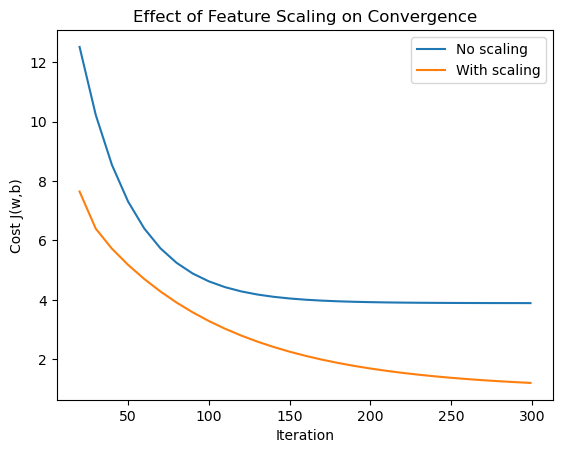

In [80]:

# Without scaling
alpha_no_scale = 5e-9    
w0 = np.zeros(n)
b0 = 0.0
w_ns, b_ns, it_ns, cost_ns = gradient_descent(X, y, w0, b0, alpha_no_scale, 300)

# With scaling
alpha_scale = 1e-1  # we can use a larger learning rate after scaling
w0_s = np.zeros(n)
b0_s = 0.0
w_s, b_s, it_s, cost_s = gradient_descent(X_scaled, y, w0_s, b0_s, alpha_scale, 300)

plt.figure()
plt.plot(it_ns[2:], cost_ns[2:], label="No scaling")
plt.plot(it_s[2:], cost_s[2:], label="With scaling")
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Effect of Feature Scaling on Convergence")
plt.legend()
plt.show()



## 7. Feature Engineering

We created new input features from the original data to help the model capture relationships better. Instead of using only mass M and temperature T, we also added M^2 to capture curvature/non-linear growth with mass and 
M*T to capture how mass and temperature together affect luminosity. Then we built a new design matrix X with these columns and trained the same linear model on this richer set of features



In [92]:
M = np.array(stellar_mass, dtype=float)
T = np.array(stellar_temperature, dtype=float)
y = np.array(L, dtype=float)

# engineered features
M2 = M**2
MT = M*T

data = pd.DataFrame({
    "M": M,
    "T": T,
    "M2": M2,
    "MT": MT,
    "L": y
})
display(data.head())

# New design matrix with engineered features
X_fe = np.column_stack((M, T, M2, MT))
print("X_fe shape:", X_fe.shape)  # (m, 4)

# Feature scaling
X_fe_scaled, means_fe, stds_fe = feature_scale(X_fe)

# Train with scaled engineered features
w0 = np.zeros(X_fe_scaled.shape[1])
b0 = 0.0
alpha = 1e-1   # larger learning rate due to scaling
iters = 300

w_fe, b_fe, it_hist, cost_hist = gradient_descent(X_fe_scaled, y, w0, b0, alpha, iters)

print("Learned parameters with engineered features (M3):")
print("w =", w_fe)
print("b =", b_fe)



,M,T,M2,MT,L
0,0.6,3800.0,0.36,2280.0,0.15
1,0.8,4400.0,0.64,3520.0,0.35
2,1.0,5800.0,1.00,5800.0,1.00
3,1.2,6400.0,1.44,7680.0,2.30
4,1.4,6900.0,1.96,9660.0,4.10


X_fe shape: (10, 4)
Iteration    0: cost =  72.4382
Iteration   10: cost =  13.0639
Iteration   20: cost =   7.6482
Iteration   30: cost =   6.3996
Iteration   40: cost =   5.7251
Iteration   50: cost =   5.1802
Iteration   60: cost =   4.7039
Iteration   70: cost =   4.2828
Iteration   80: cost =   3.9099
Iteration   90: cost =   3.5795
Iteration  100: cost =   3.2868
Iteration  110: cost =   3.0274
Iteration  120: cost =   2.7976
Iteration  130: cost =   2.5939
Iteration  140: cost =   2.4133
Iteration  150: cost =   2.2532
Iteration  160: cost =   2.1112
Iteration  170: cost =   1.9853
Iteration  180: cost =   1.8736
Iteration  190: cost =   1.7745
Iteration  200: cost =   1.6865
Iteration  210: cost =   1.6083
Iteration  220: cost =   1.5389
Iteration  230: cost =   1.4772
Iteration  240: cost =   1.4224
Iteration  250: cost =   1.3736
Iteration  260: cost =   1.3301
Iteration  270: cost =   1.2914
Iteration  280: cost =   1.2570
Iteration  290: cost =   1.2262
Iteration  299: cost


## 8. Polynomial Regression

We built a simple polynomial model by using M and M^2 as the inputs, so the prediction can follow a curved trend rather than a straight line. Even though it models a non-linear pattern in M, it is still linear in the parameters the weights, so we can train it with the same gradient descent code as before


In [95]:

# Polynomial regression with feature M and M^2
M = np.array(stellar_mass, dtype=float)
y = np.array(L, dtype=float)

M_only = M

# Create polynomial features: [M, M^2]
X_poly = np.column_stack((M_only, M_only**2))   # [M, M^2]

# feature scaling for GD
X_poly_scaled, means_poly, stds_poly = feature_scale(X_poly)

# Train polynomial model with GD (same implementation)
w0 = np.zeros(X_poly_scaled.shape[1])
b0 = 0.0
alpha_poly = 1e-1   # with scaling you can use a larger alpha 
iters_poly = 500

w_poly, b_poly, it_poly, cost_poly = gradient_descent(
    X_poly_scaled, y, w0, b0, alpha_poly, iters_poly
)

print("Learned parameters for polynomial regression (M and M^2):")
print("w_poly =", w_poly)
print("b_poly =", b_poly)
print("Final loss =", compute_cost(X_poly_scaled, y, w_poly, b_poly))


Iteration    0: cost =  86.8417
Iteration   10: cost =  11.8811
Iteration   20: cost =   6.6413
Iteration   30: cost =   5.9156
Iteration   40: cost =   5.6951
Iteration   50: cost =   5.5392
Iteration   60: cost =   5.3946
Iteration   70: cost =   5.2549
Iteration   80: cost =   5.1191
Iteration   90: cost =   4.9870
Iteration  100: cost =   4.8586
Iteration  110: cost =   4.7337
Iteration  120: cost =   4.6123
Iteration  130: cost =   4.4942
Iteration  140: cost =   4.3793
Iteration  150: cost =   4.2676
Iteration  160: cost =   4.1590
Iteration  170: cost =   4.0533
Iteration  180: cost =   3.9506
Iteration  190: cost =   3.8506
Iteration  200: cost =   3.7535
Iteration  210: cost =   3.6589
Iteration  220: cost =   3.5670
Iteration  230: cost =   3.4777
Iteration  240: cost =   3.3907
Iteration  250: cost =   3.3062
Iteration  260: cost =   3.2240
Iteration  270: cost =   3.1440
Iteration  280: cost =   3.0663
Iteration  290: cost =   2.9907
Iteration  300: cost =   2.9171
Iteratio

### 8.1 Visualize Polynomial Fit

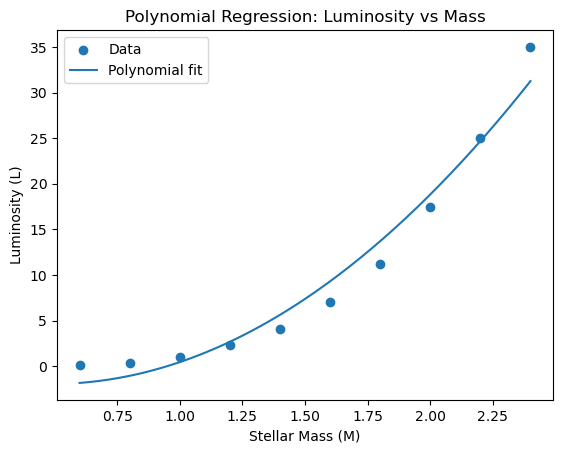

In [ ]:
# Plot polynomial fit
M_grid = np.linspace(M.min(), M.max(), 200)

# Design matrix for grid points
X_grid = np.column_stack((M_grid, M_grid**2))

# Apply the same scaling used in training
X_grid_scaled = (X_grid - means_poly) / stds_poly

L_grid_pred = predict(X_grid_scaled, w_poly, b_poly)

plt.figure()
plt.scatter(M, y, label="Data")
plt.plot(M_grid, L_grid_pred, label="Polynomial fit")
plt.xlabel("Stellar Mass (M)")
plt.ylabel("Luminosity (L)")
plt.title("Polynomial Regression: Luminosity vs Mass")
plt.legend()
plt.show()


After training the polynomial model, we created many evenly spaced mass values M across the data range and computed the predicted luminosity for each one. Then we plotted the original data points and the smooth prediction curve on the same graph, so we can visually see how well the polynomial model follows the data trend